# Criteria to select genes and cells

- eliminate proliferating cell types (not interested in proliferating cell states)
- remake the gene lists based on the DE new criteria (wilcox, pval threshold, sorted by logfc)

In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse
import anndata
import seaborn as sns
#import scvelo as scv

#import milopy.core as milo
#import milopy.plot as milopl


In [2]:
sc.set_figure_params(dpi=80, dpi_save=600) # Makes it more visible

In [3]:
tmpfile = '../h5ad_files/Bcells_lineage_wilcox_tmp.h5ad'

In [4]:
adata = sc.read_h5ad('../h5ad_files/Bcells.h5ad')
adata

AnnData object with n_obs × n_vars = 54934 × 36503
    obs: 'donor_id', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_type_ontology_term_id_colors', 'default_embedding', 'development_stage_ontology_term_id_colors', 'schema_version', 'sex_ontology_term_id_colors', 'title'
    obsm: 'X_umap'

In [6]:
adata.raw

In [7]:
adata = adata.raw.to_adata()

In [8]:
adata.X.max()

66149.0

In [9]:
adata

AnnData object with n_obs × n_vars = 54934 × 36503
    obs: 'donor_id', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_type_ontology_term_id_colors', 'default_embedding', 'development_stage_ontology_term_id_colors', 'schema_version', 'sex_ontology_term_id_colors', 'title'
    obsm: 'X_umap'

In [10]:
adata.obs["Manually_curated_celltype"].cat.categories

Index(['ABCs', 'GC_B (I)', 'GC_B (II)', 'MNP/B doublets', 'Memory B cells',
       'Naive B cells', 'Plasma cells', 'Plasmablasts', 'Pre-B', 'Pro-B',
       'T/B doublets'],
      dtype='object')

In [ ]:
adata.obs["Manually_curated_celltype"].cat.categories

## REPEAT THE PROCESS AS THE MYELOID

/home/irepan/anaconda3/envs/pyscenic/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


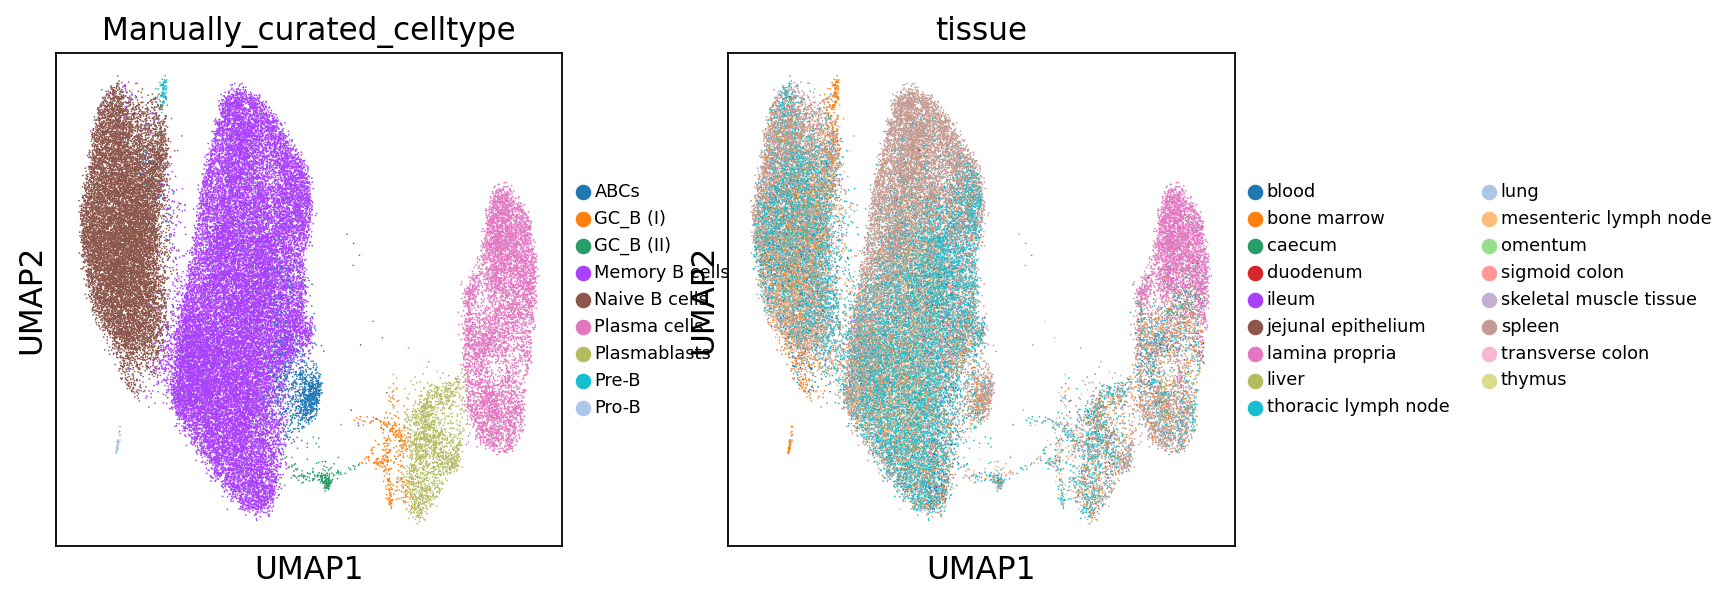

In [15]:
sc.pl.umap(adata, color=["Manually_curated_celltype","tissue"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

In [12]:
adata = adata[adata.obs['Manually_curated_celltype'].isin(['ABCs', 'GC_B (I)', 'GC_B (II)', 
                                                           'Memory B cells', 'Naive B cells',
                                                           'Plasma cells', 'Plasmablasts',
                                                           'Pre-B', 'Pro-B'])]

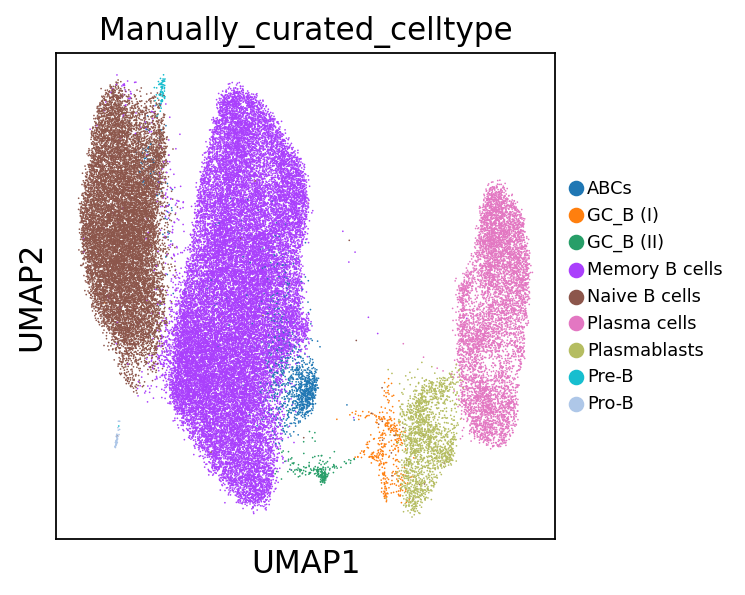

In [13]:
sc.pl.umap(adata, color="Manually_curated_celltype",#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

<AxesSubplot:title={'center':'adata'}>

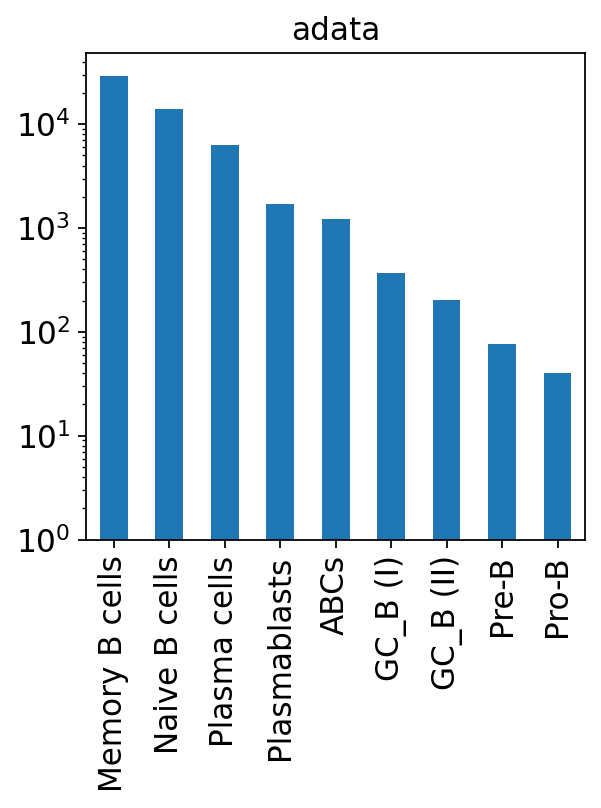

In [14]:
adata.obs['Manually_curated_celltype'].value_counts().plot(kind='bar', log="y",
                                                           grid=False, title='adata')

In [ ]:
# target_cells = 2000

# adatas = [adata[adata.obs['Manually_curated_celltype'].isin([clust])] for clust in adata.obs['Manually_curated_celltype'].cat.categories]

# for dat in adatas:
#     if dat.n_obs > target_cells:
#         sc.pp.subsample(dat, n_obs=target_cells, random_state=0)

# adata_sample1 = adatas[0].concatenate(*adatas[1:])

In [ ]:
# adata_sample1

In [ ]:
# adata_sample1.obs['Manually_curated_celltype'].value_counts().plot(kind='bar', #log="y",
#                                                                    grid=False, title='sampled cells')

In [ ]:
# adata = adata_sample1

In [ ]:
# sc.pl.umap(adata, color="Manually_curated_celltype",#save= "Lymphoid.png",
#            legend_fontoutline=1, legend_fontsize=8)

In [16]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=10e4)
sc.pp.log1p(adata)

In [17]:
#pip install --user scikit-misc
#sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor= "seurat_v3" )min_mean :
sc.settings.verbosity = 4
sc.pp.highly_variable_genes(adata, min_mean=0.3, max_mean=5)

extracting highly variable genes
    Gene indices [4368, 19943] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


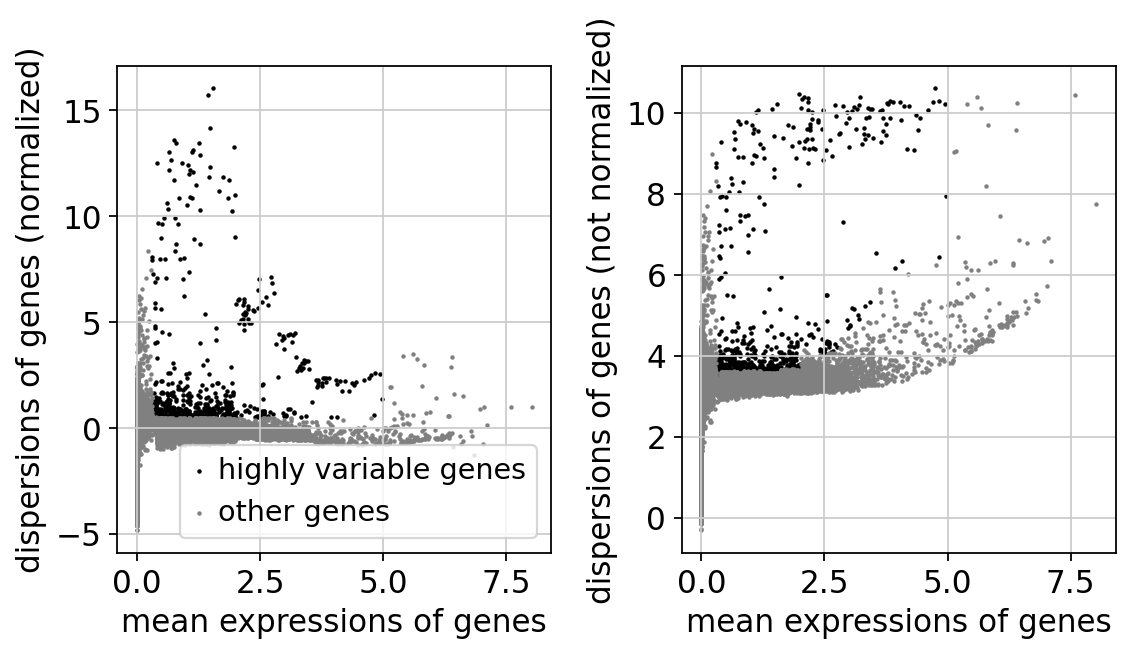

In [18]:
sc.pl.highly_variable_genes(adata)

normalizing counts per cell
    finished (0:00:00)


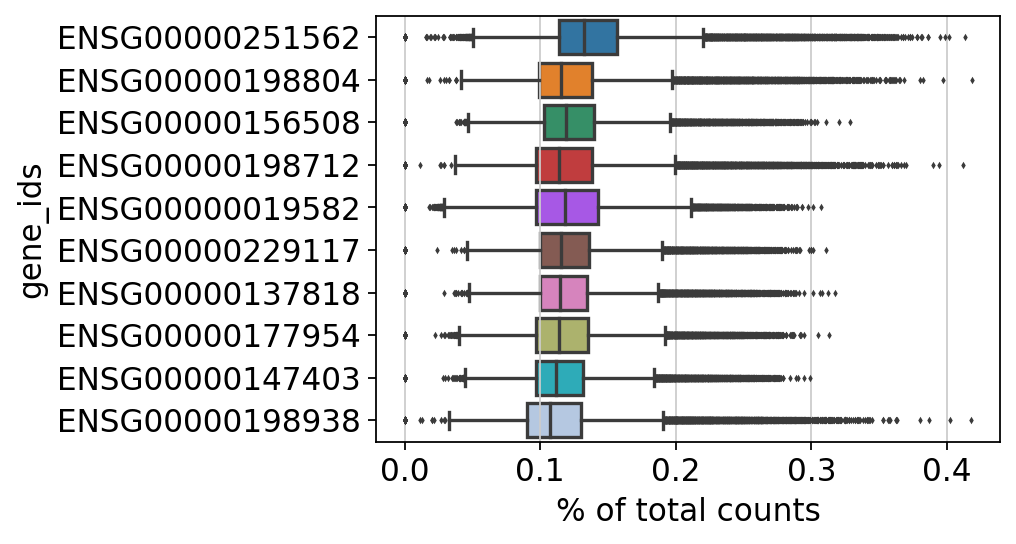

In [19]:
sc.pl.highest_expr_genes(adata, n_top=10, show=True)

ranking genes
    consider 'Manually_curated_celltype' groups:
    with sizes: [ 1209   369   203 28915 13998  6270  1710    75    39]
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:34)


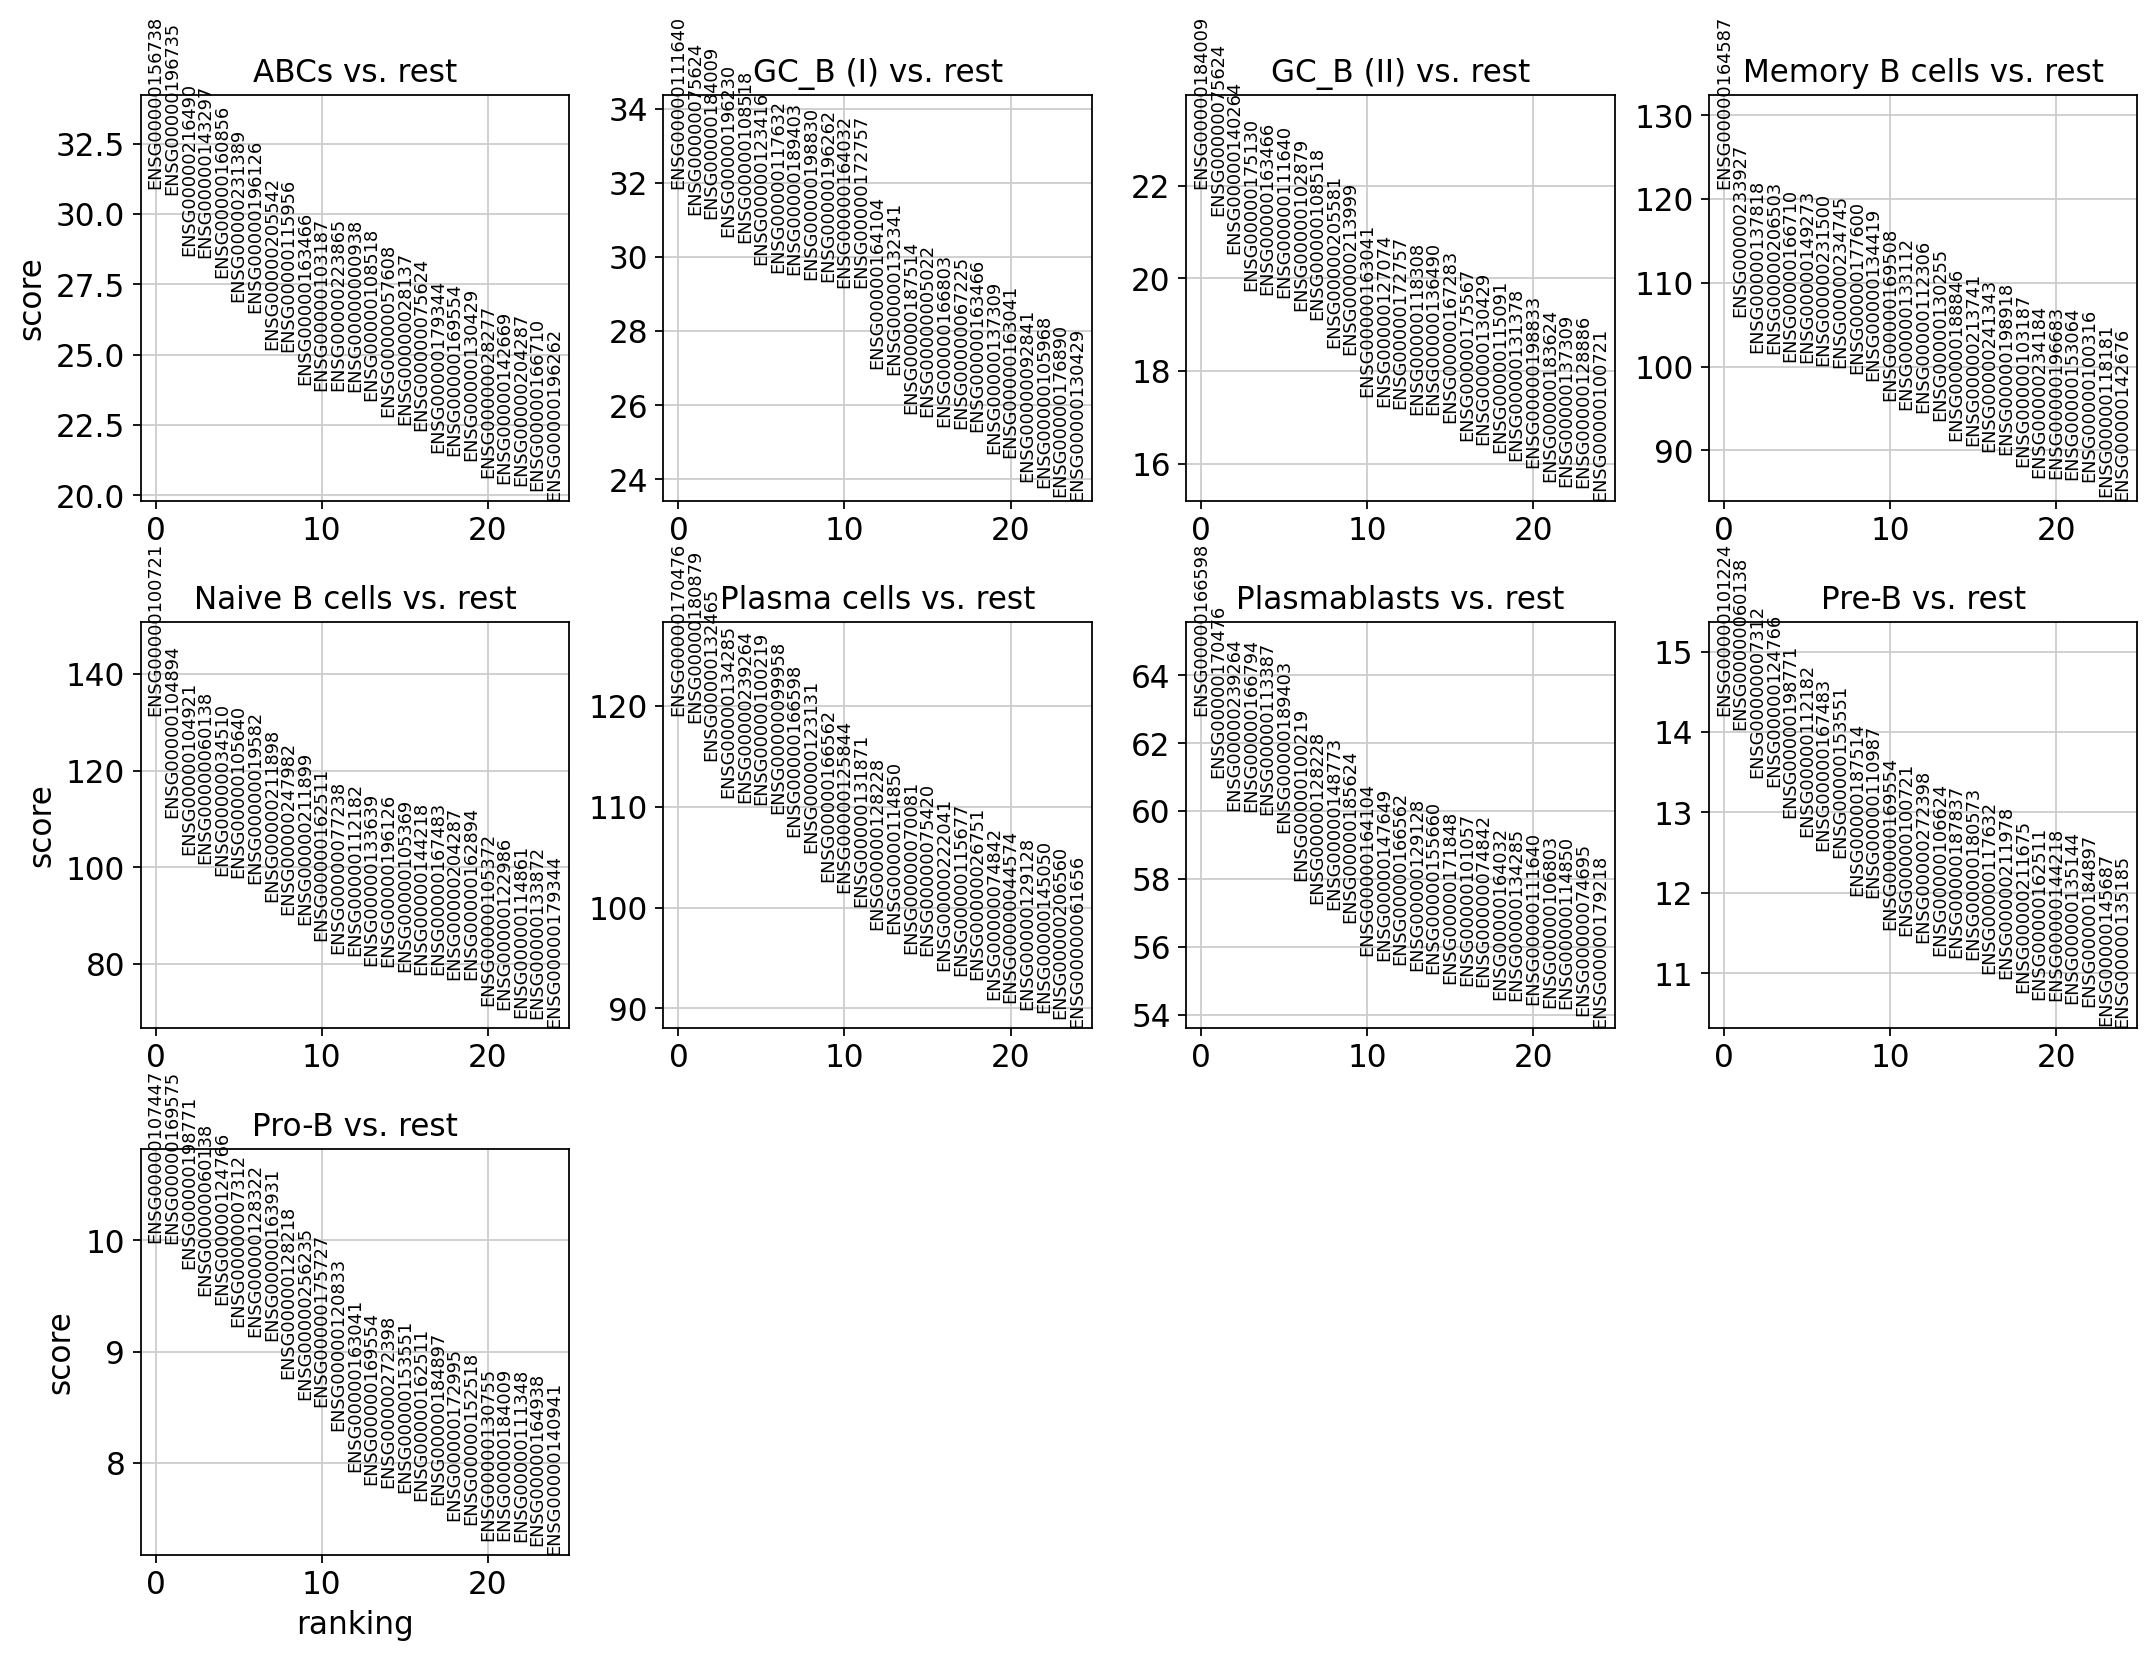

In [20]:
sc.tl.rank_genes_groups(adata, groupby= 'Manually_curated_celltype', method='wilcoxon', key_added= "wilcoxon")
sc.pl.rank_genes_groups(adata,  n_genes=25,  sharey=False, key= "wilcoxon")

In [21]:
adata.X.max()

11.15944

In [23]:
adata.write(tmpfile)

## Read prepocessed data

In [4]:
adata = sc.read_h5ad(tmpfile)

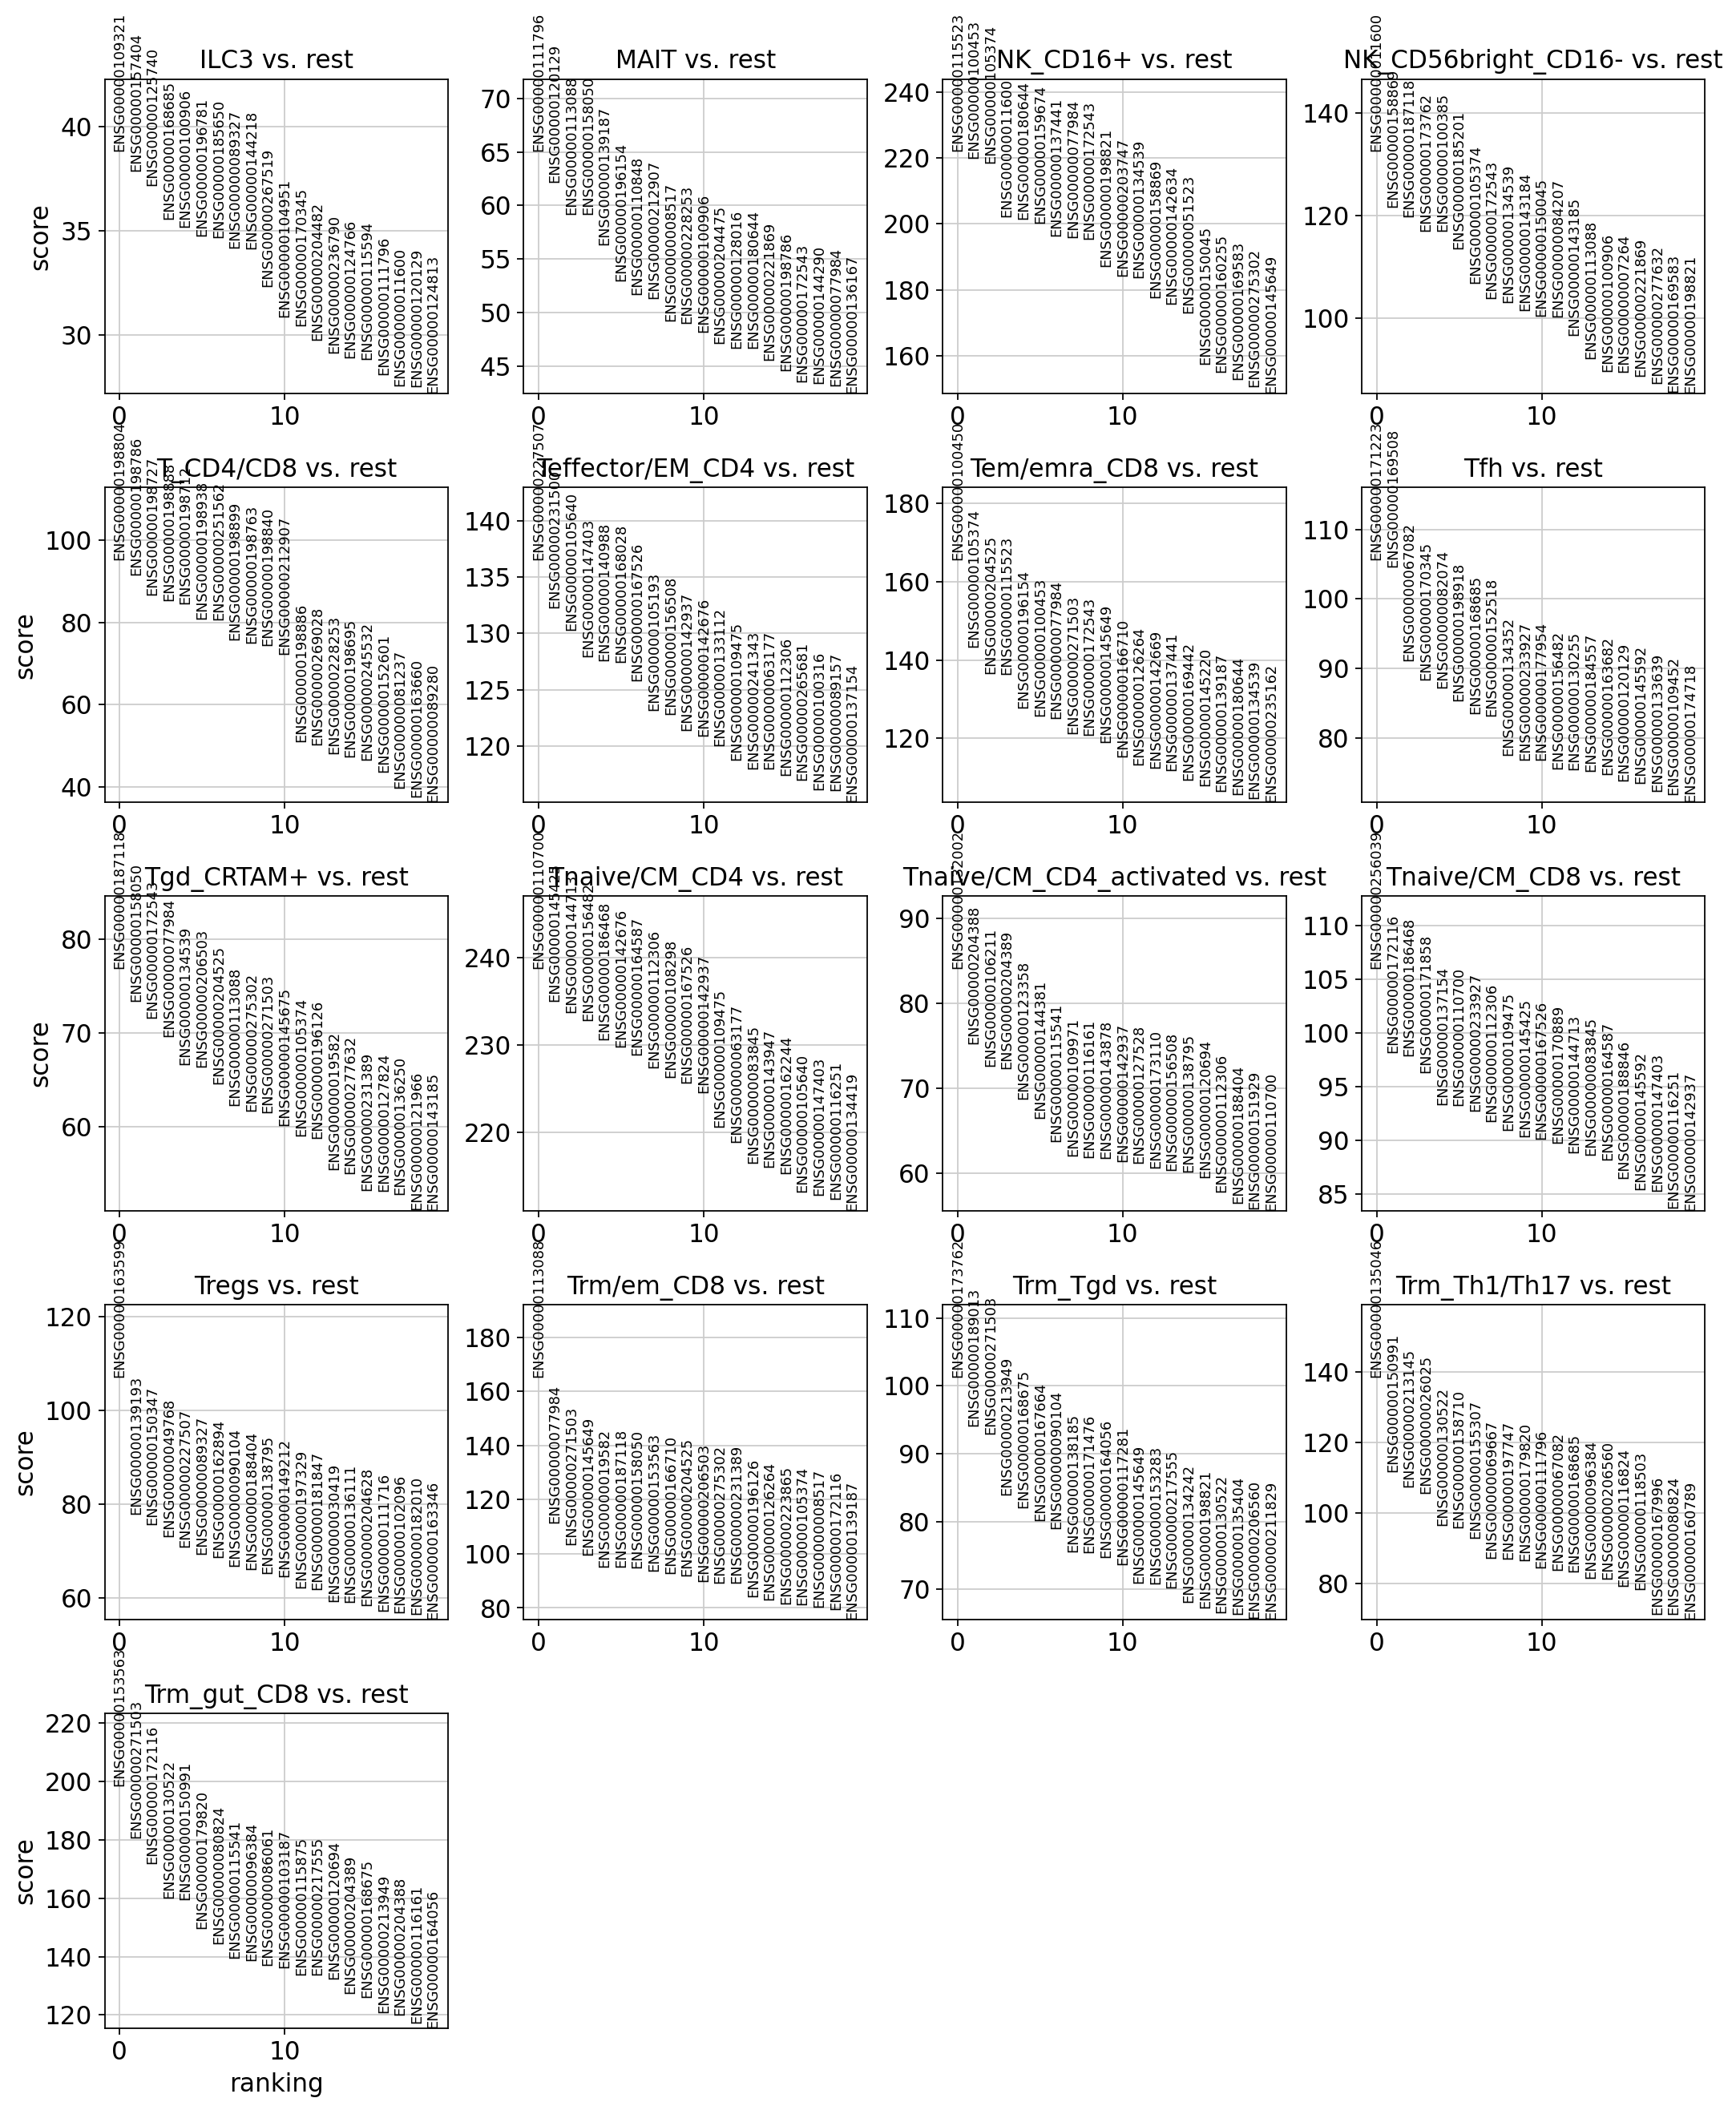

In [5]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, key = "wilcoxon")

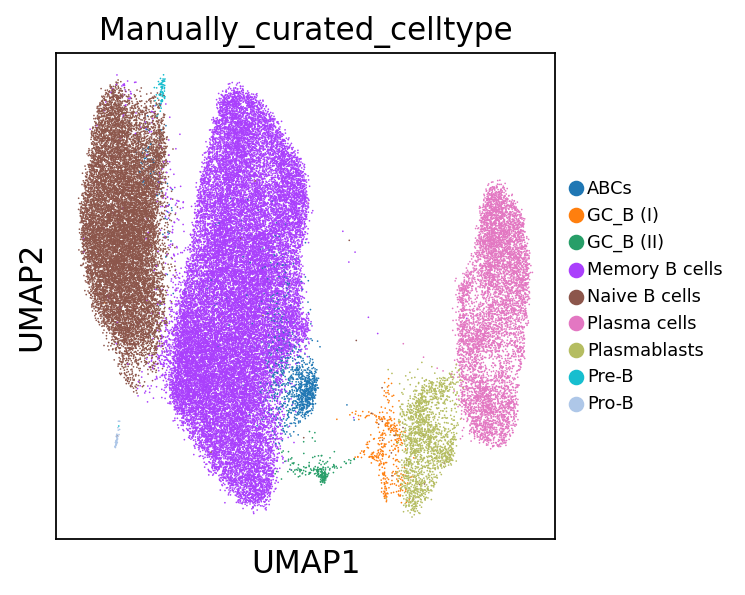

In [24]:
sc.pl.umap(adata, color="Manually_curated_celltype",#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

## Loop to produce the lists of Bcell lineages

In [25]:
Subtypes = adata.obs['Manually_curated_celltype'].unique()
Subtypes

['Memory B cells', 'Naive B cells', 'Plasma cells', 'ABCs', 'GC_B (I)', 'GC_B (II)', 'Plasmablasts', 'Pro-B', 'Pre-B']
Categories (9, object): ['ABCs', 'GC_B (I)', 'GC_B (II)', 'Memory B cells', ..., 'Plasma cells', 'Plasmablasts', 'Pre-B', 'Pro-B']

In [26]:
for i in range(0,len(Subtypes)):
    print(i, Subtypes[i])

0 Memory B cells
1 Naive B cells
2 Plasma cells
3 ABCs
4 GC_B (I)
5 GC_B (II)
6 Plasmablasts
7 Pro-B
8 Pre-B


### Marker genes for each Subtype

In [27]:
Markers = [[]]*len(Subtypes)

for i in range(0,len(Subtypes)):
    print(i, Subtypes[i])
    m = sc.get.rank_genes_groups_df(adata, group=Subtypes[i],
                                    key='wilcoxon', pval_cutoff=0.0001,
                                    log2fc_min=1)
    m = m.sort_values("logfoldchanges", ascending=False)
    m.reset_index(drop=True, inplace=True)
    Markers[i] = m

0 Memory B cells
1 Naive B cells
2 Plasma cells
3 ABCs
4 GC_B (I)
5 GC_B (II)
6 Plasmablasts
7 Pro-B
8 Pre-B


In [33]:
Markers[1]["names"][0:8]

0    ENSG00000100721
1    ENSG00000026559
2    ENSG00000257275
3    ENSG00000224610
4    ENSG00000213231
5    ENSG00000198598
6    ENSG00000187621
7    ENSG00000077238
Name: names, dtype: object

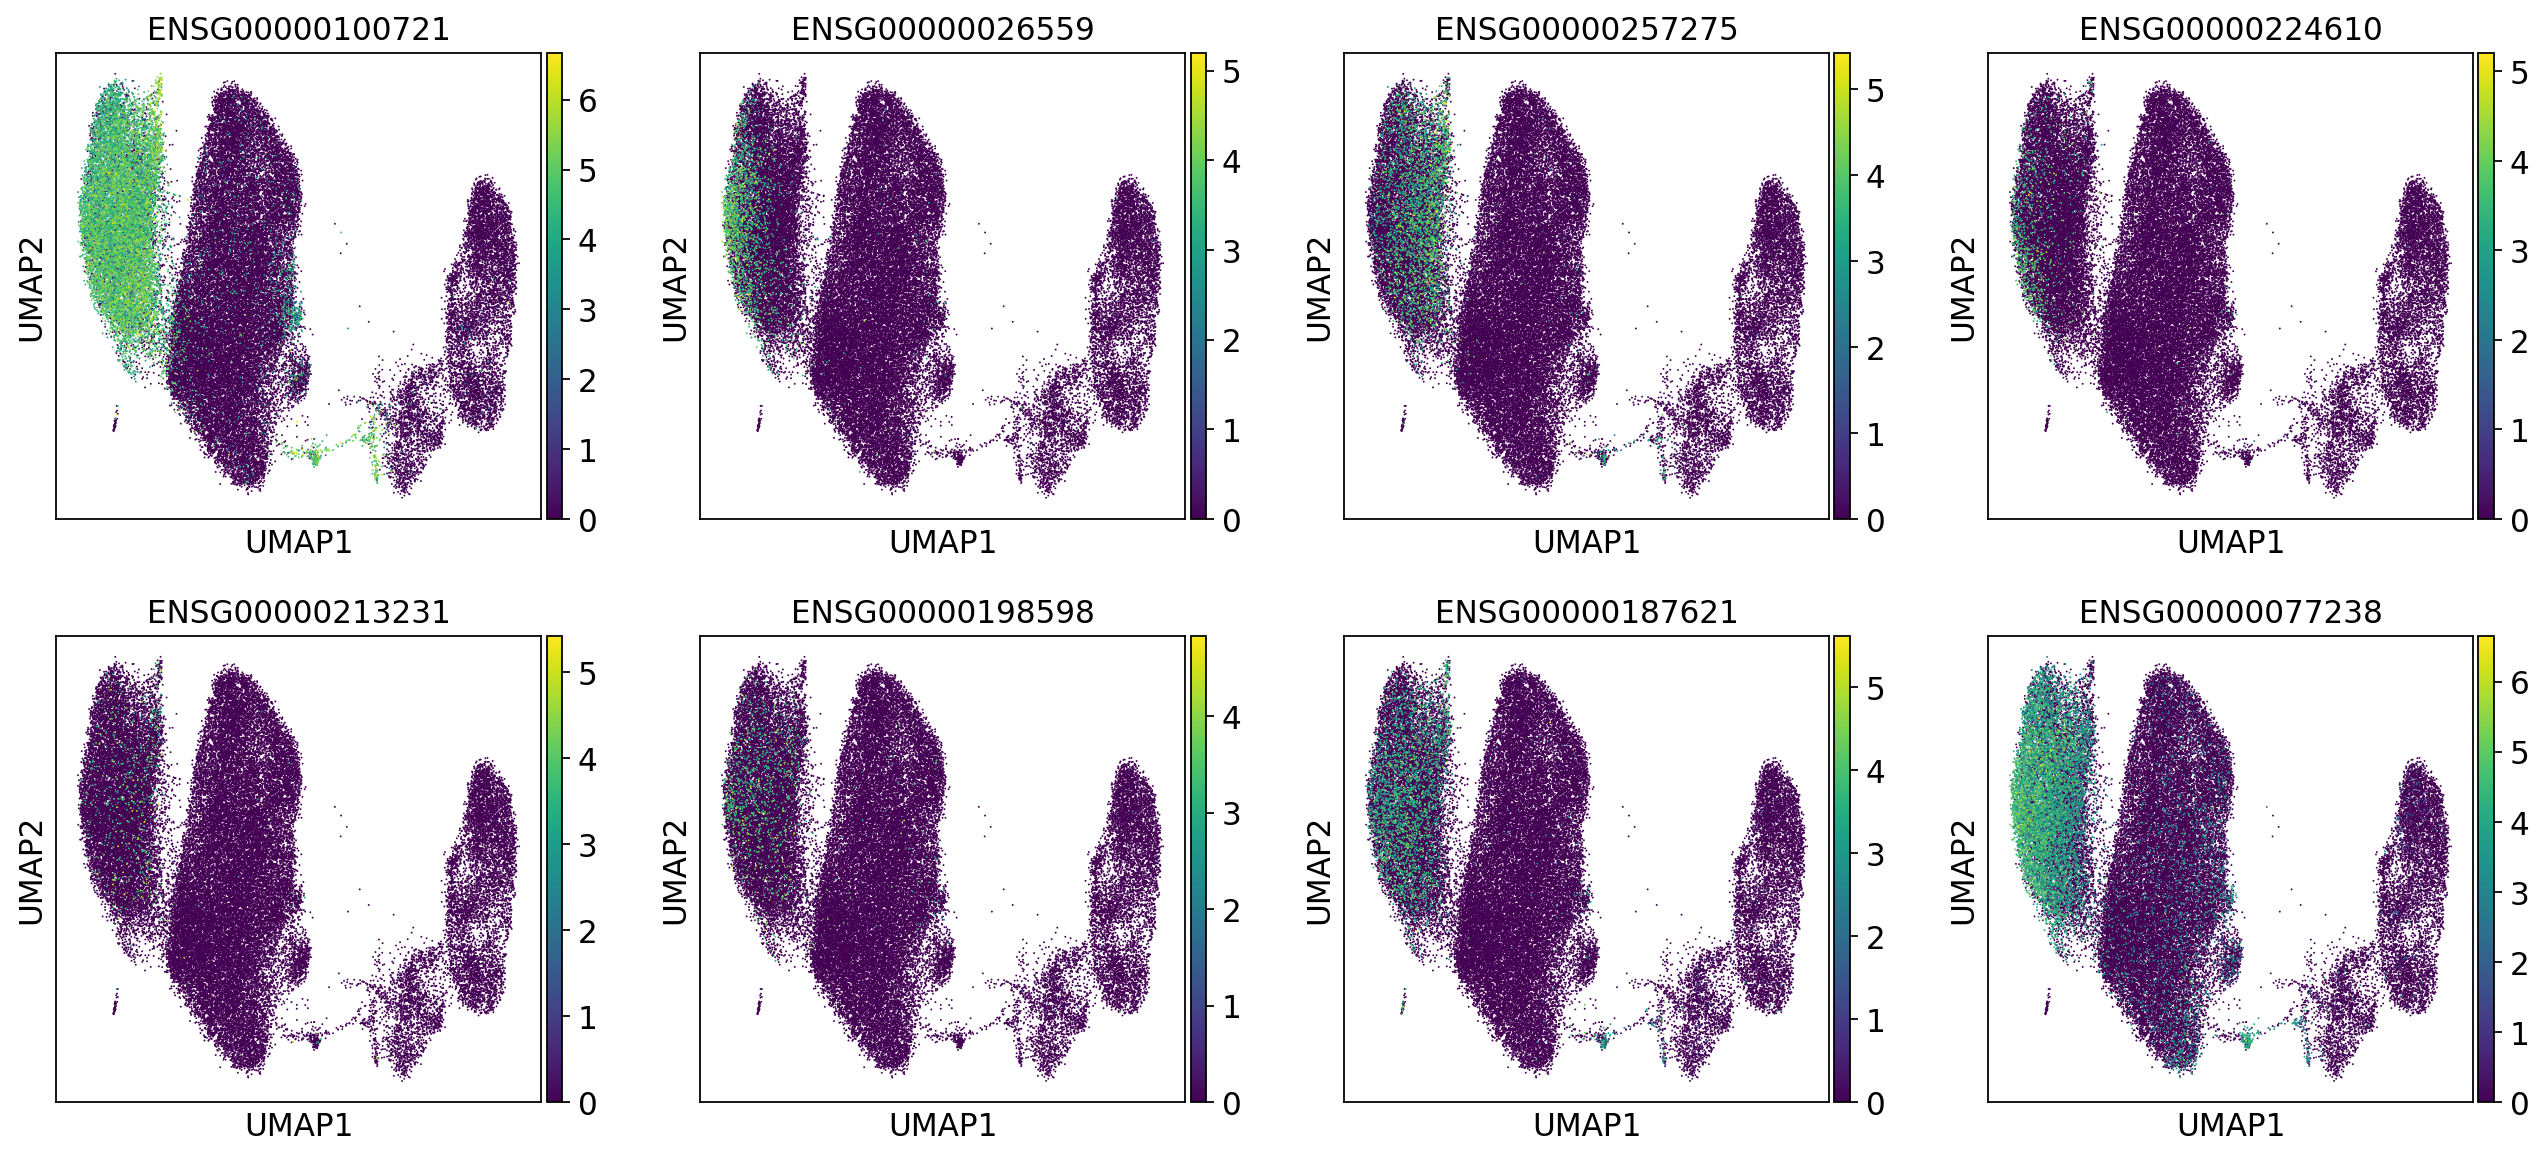

In [34]:
sc.pl.umap(adata, color= Markers[1]["names"][0:8], size=3 ) # top

### Get names of 300 top markers (if possible) for each Subtype

In [35]:
#pip install upsetplot
from upsetplot import from_contents
from upsetplot import UpSet

In [36]:
Sets = [[]]*len(Subtypes)
CompleteSets = [[]]*len(Subtypes)

for i in range(0,len(Subtypes)):
    CompleteSets[i] = Markers[i]['names']
    n = len(Markers[i])
    print(i, Subtypes[i], n)
    if n > 300 :
        print("yes")
        Sets[i] = Markers[i].loc[0:299,'names']
    else :
        print("no")
        Sets[i] = Markers[i].loc[0:n-1,'names']

0 Memory B cells 414
yes
1 Naive B cells 232
no
2 Plasma cells 1821
yes
3 ABCs 469
yes
4 GC_B (I) 1390
yes
5 GC_B (II) 452
yes
6 Plasmablasts 5278
yes
7 Pro-B 107
no
8 Pre-B 206
no


In [37]:
Dict_markers =  {}
CompleteDict_markers =  {}

for i in range(0,len(Subtypes)):
    Dict_markers[Subtypes[i]] = Sets[i]
    CompleteDict_markers[Subtypes[i]] = CompleteSets[i]

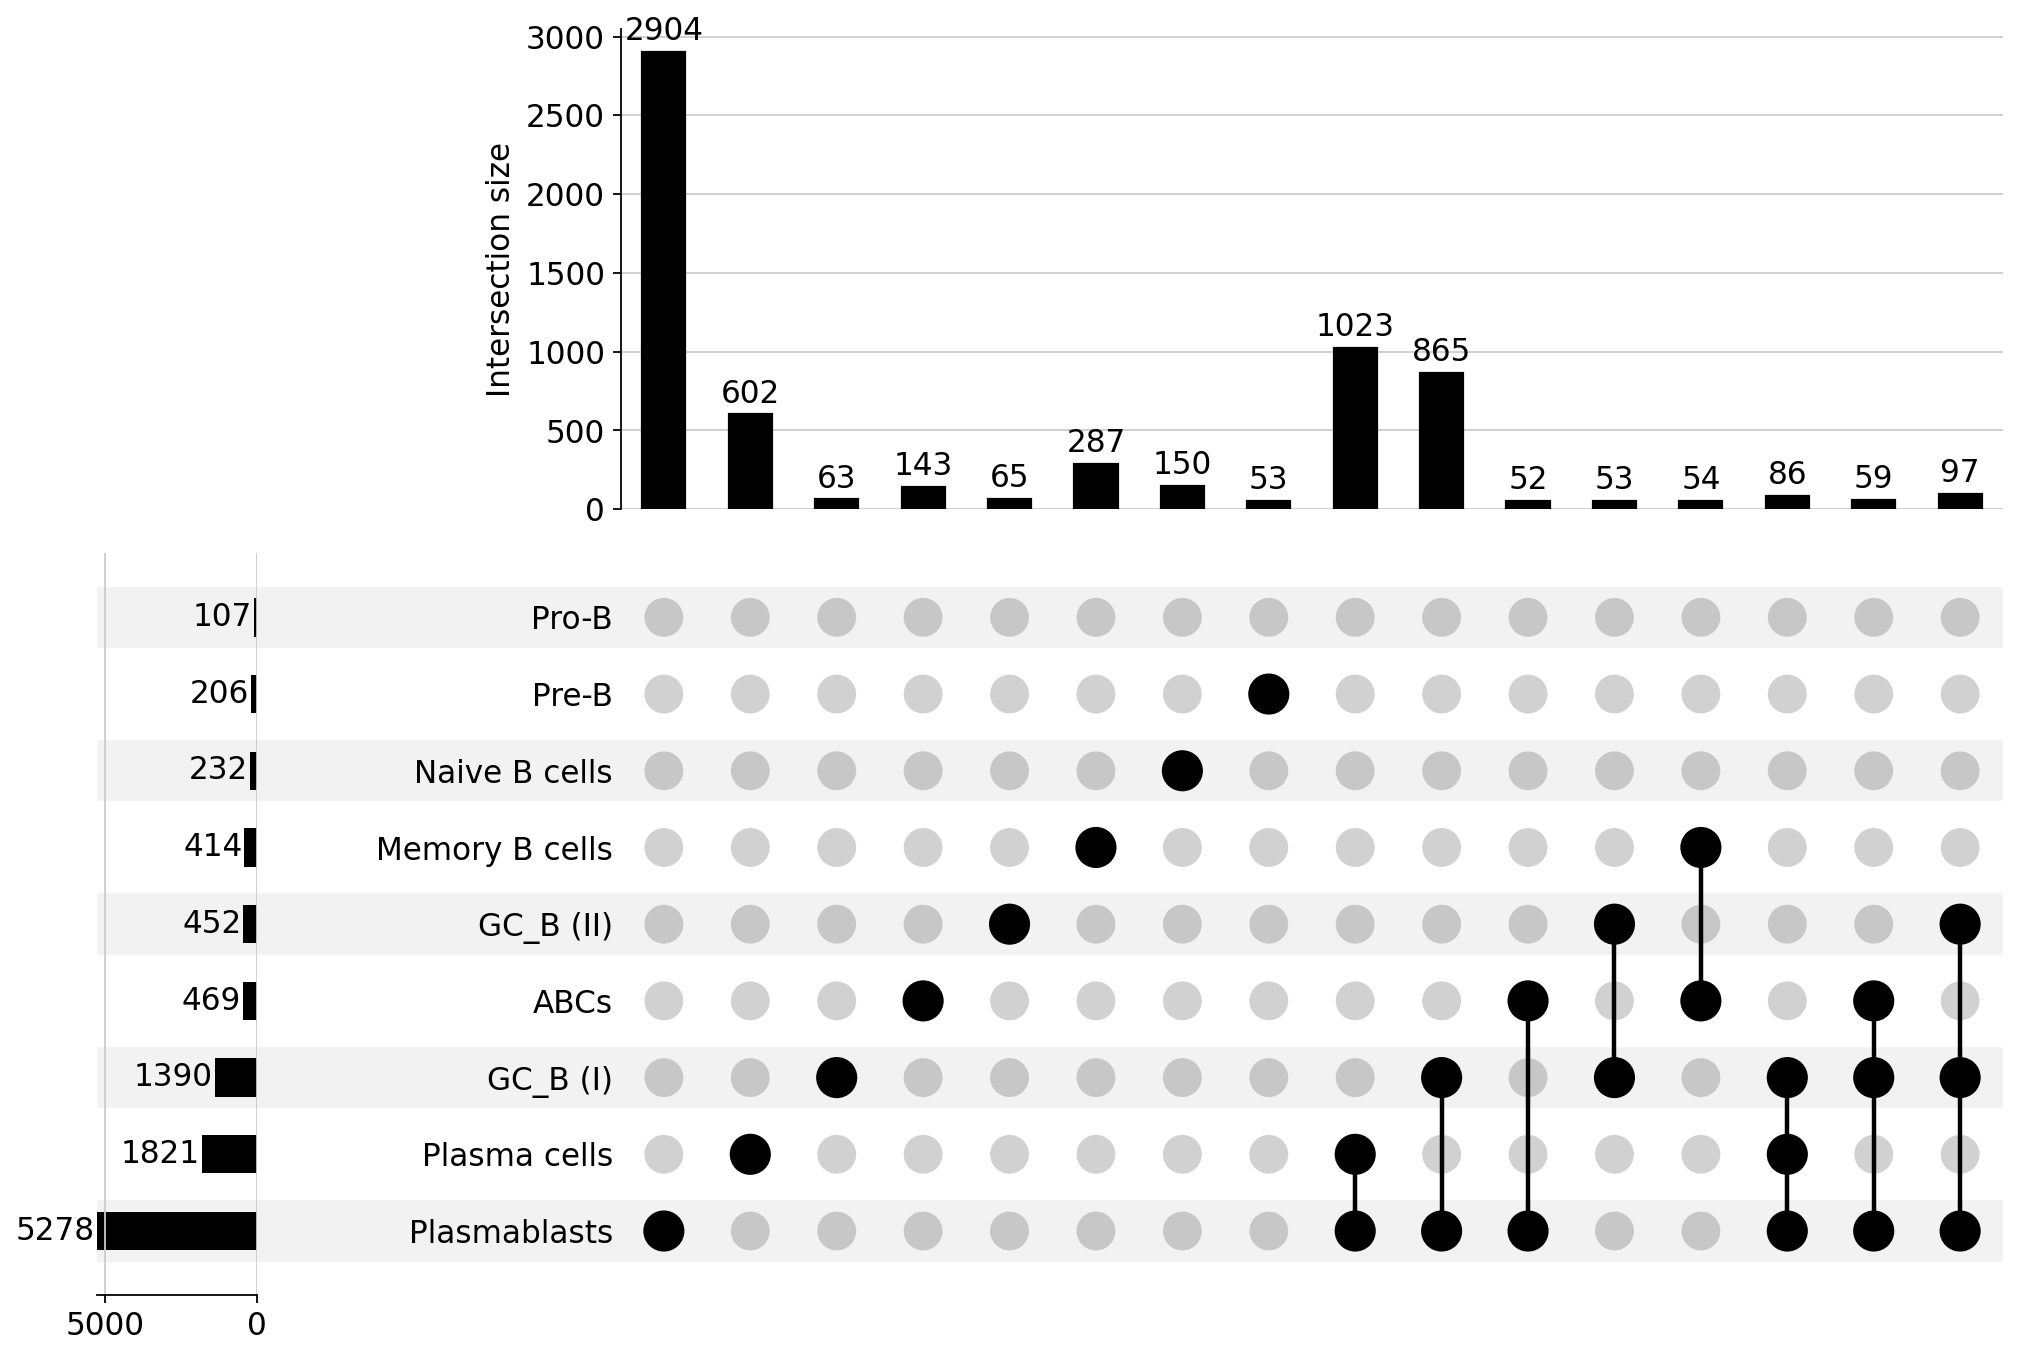

In [38]:
CT_markers = from_contents(CompleteDict_markers)

plt = UpSet(CT_markers, min_subset_size=50, subset_size='count',element_size=50,  show_counts=True).plot()

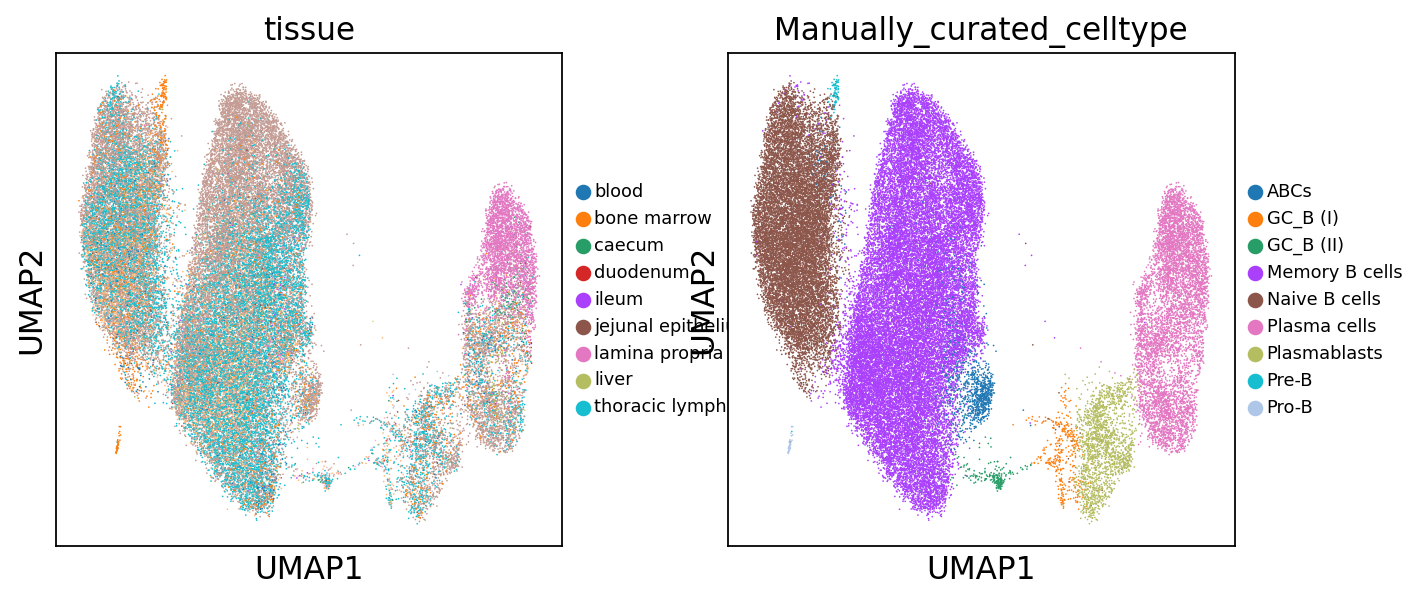

In [39]:
sc.pl.umap(adata, color=["tissue",'Manually_curated_celltype'] ,#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

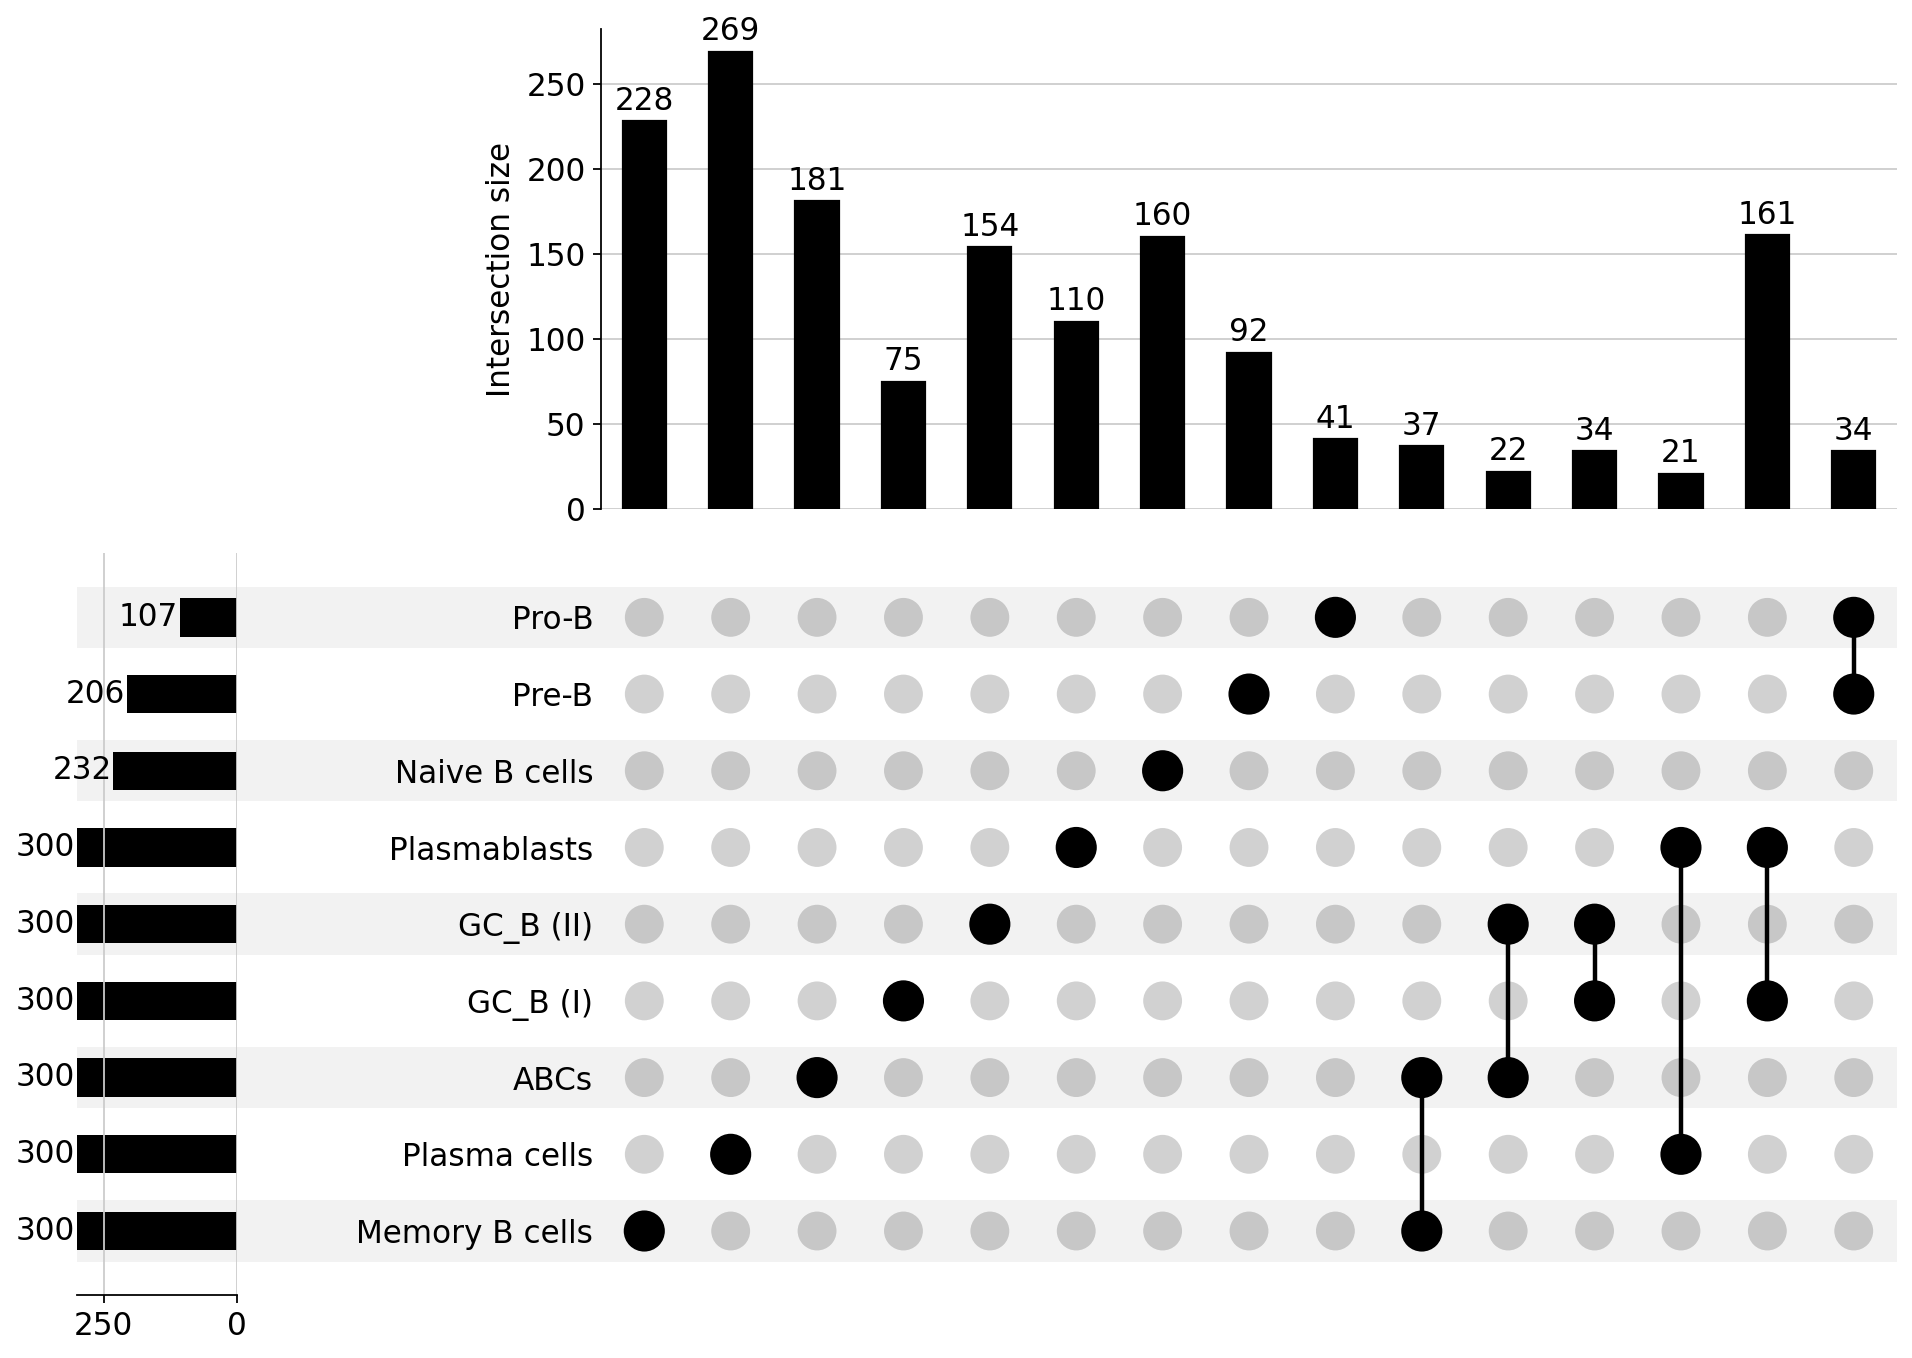

In [40]:
CT_markers = from_contents(Dict_markers)

plt = UpSet(CT_markers, min_subset_size=20, subset_size='count',element_size=50,  show_counts=True).plot()

In [41]:
Dict_markers['Plasma cells'].loc[0:9]

0    ENSG00000235366
1    ENSG00000198732
2    ENSG00000137634
3    ENSG00000116748
4    ENSG00000081803
5    ENSG00000132465
6    ENSG00000196169
7    ENSG00000077943
8    ENSG00000164932
9    ENSG00000259803
Name: names, dtype: object

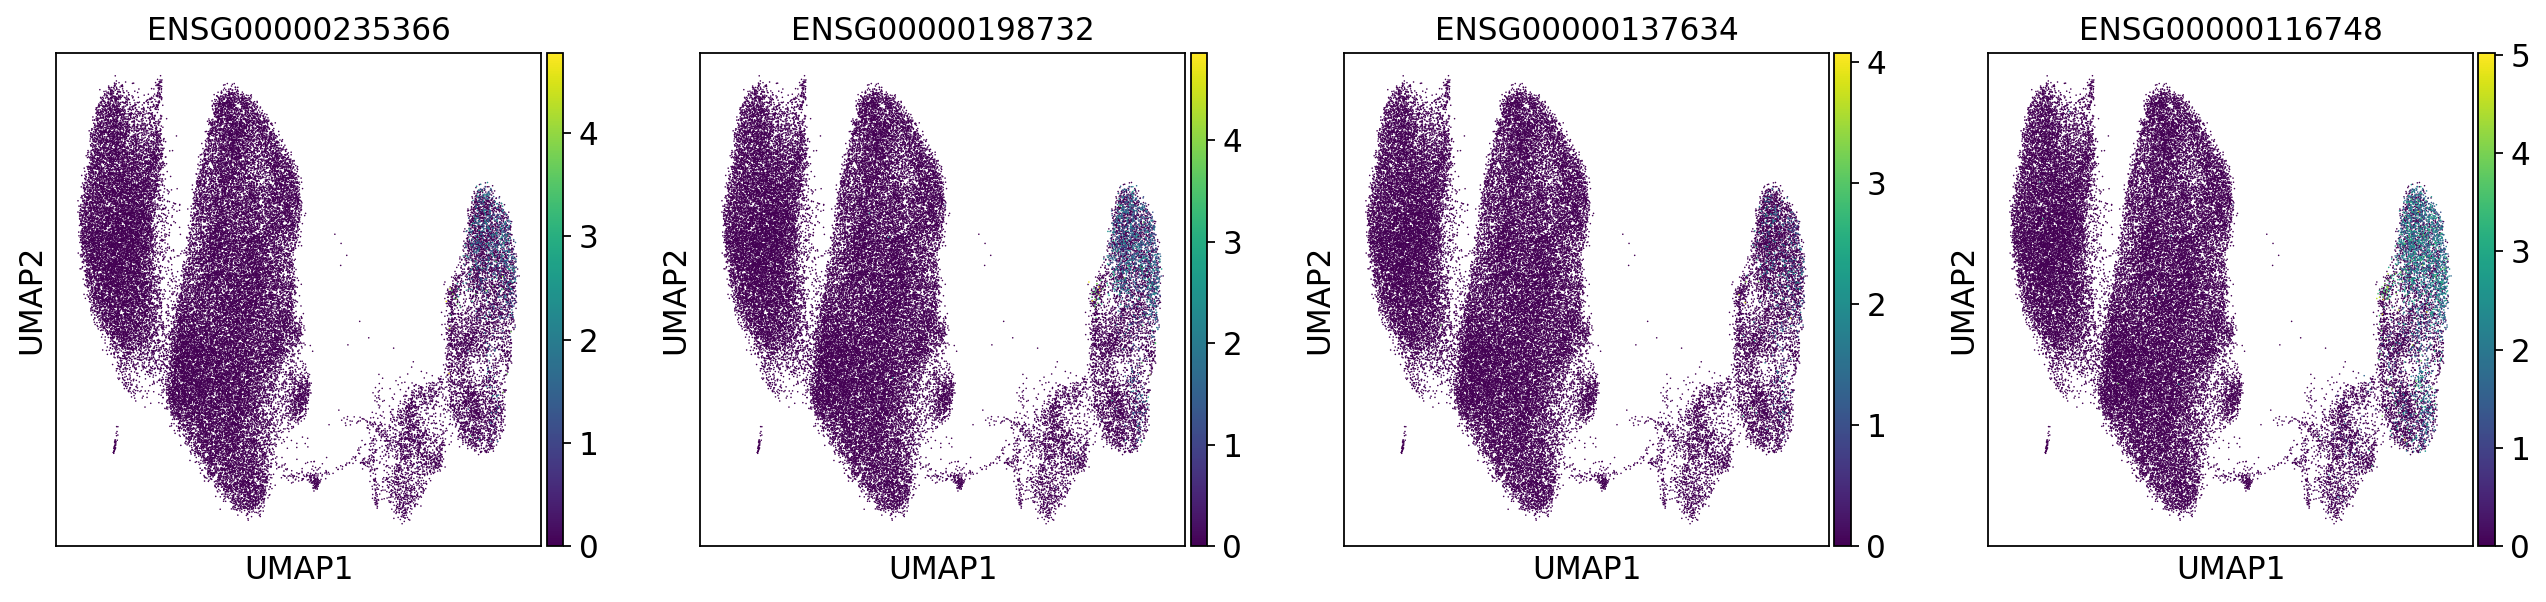

In [44]:
sc.pl.umap(adata, color=Dict_markers['Plasma cells'].loc[0:3], size=2) # top

In [45]:
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(Sets[0], Sets[2], Sets[3],
                           Sets[4], Sets[5], Sets[6]
                          )),
                  columns =[Subtypes[0], Subtypes[2], Subtypes[3],
                            Subtypes[4], Subtypes[5], Subtypes[6]
                           ])

Naive_Bcells_df = pd.DataFrame(list(zip(Sets[1])),columns =[Subtypes[1]])
Naive_Bcells_df.columns = ['Naive_Bcells']

ProB_df = pd.DataFrame(list(zip(Sets[7])),columns =[Subtypes[7]])
ProB_df.columns = ['ProB']

PreB_df = pd.DataFrame(list(zip(Sets[8])),columns =[Subtypes[8]])
PreB_df.columns = ['PreB']


In [46]:
df

Memory B cells     Plasma cells             ABCs         GC_B (I)  \
0    ENSG00000146938  ENSG00000235366  ENSG00000140678  ENSG00000166803   
1    ENSG00000196132  ENSG00000198732  ENSG00000134532  ENSG00000175063   
2    ENSG00000167748  ENSG00000137634  ENSG00000105246  ENSG00000176890   
3    ENSG00000234184  ENSG00000116748  ENSG00000000938  ENSG00000144354   
4    ENSG00000165810  ENSG00000081803  ENSG00000101336  ENSG00000117632   
..               ...              ...              ...              ...   
295  ENSG00000164169  ENSG00000213316  ENSG00000136286  ENSG00000175279   
296  ENSG00000114648  ENSG00000198855  ENSG00000213402  ENSG00000197451   
297  ENSG00000059588  ENSG00000186522  ENSG00000137309  ENSG00000106399   
298  ENSG00000184305  ENSG00000149428  ENSG00000137076  ENSG00000182054   
299  ENSG00000143878  ENSG00000074695  ENSG00000140853  ENSG00000065911   

           GC_B (II)     Plasmablasts  
0    ENSG00000127074  ENSG00000171848  
1    ENSG00000225885  ENSG00000148773  
2    ENSG00000170054  ENSG00000089685  
3    ENSG00000213999  ENSG00000176890  
4    ENSG00000175600  ENSG00000126787  
..               ...              ...  
295  ENSG00000115935  ENSG00000232445  
296  ENSG00000160213  ENSG00000101447  
297  ENSG00000111348  ENSG00000134291  
298  ENSG00000111229  ENSG00000076003  
299  ENSG00000004779  ENSG00000160949  

[300 rows x 6 columns]

In [47]:
PreB_df

PreB
0    ENSG00000167244
1    ENSG00000128322
2    ENSG00000172995
3    ENSG00000169575
4    ENSG00000256235
..               ...
201  ENSG00000113387
202  ENSG00000134884
203  ENSG00000189403
204  ENSG00000158517
205  ENSG00000075624

[206 rows x 1 columns]

In [48]:
# pip install rpy2
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

In [49]:
%%R -i df -w 5 -h 5 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution
# library("EnsDb.Hsapiens.v86")

head(df)

   Memory B cells    Plasma cells            ABCs        GC_B (I)
0 ENSG00000146938 ENSG00000235366 ENSG00000140678 ENSG00000166803
1 ENSG00000196132 ENSG00000198732 ENSG00000134532 ENSG00000175063
2 ENSG00000167748 ENSG00000137634 ENSG00000105246 ENSG00000176890
3 ENSG00000234184 ENSG00000116748 ENSG00000000938 ENSG00000144354
4 ENSG00000165810 ENSG00000081803 ENSG00000101336 ENSG00000117632
5 ENSG00000174473 ENSG00000132465 ENSG00000073737 ENSG00000171848
        GC_B (II)    Plasmablasts
0 ENSG00000127074 ENSG00000171848
1 ENSG00000225885 ENSG00000148773
2 ENSG00000170054 ENSG00000089685
3 ENSG00000213999 ENSG00000176890
4 ENSG00000175600 ENSG00000126787
5 ENSG00000111732 ENSG00000139734


In [51]:
%%R

library(stringr)
dim(df)
genelists <- colnames(df)
path <- "~/Desktop/Github/Immune_Adaptation_Atlas/adult_tissues/ENS_genelists_wilcox/Bcells/"

for (i in genelists)
    {
    goi <- df[,i]
#    #print(i)
    f <- str_replace_all(i, " ", "_")
    f <- str_remove_all(f, "[()]")
    print(f)
#    ens_df <- ensembldb::select(EnsDb.Hsapiens.v86, keys= goi, 
#                              keytype = "SYMBOL", 
#                              columns = c("SYMBOL","GENEID"))
#   
#    ens_df <- ens_df$GENEID[grepl(pattern = "^ENS", x = ens_df$GENEID)]
#    #print(head(ens_df)) 
#
#    write(x = ens_df, file = paste0(path, f ,"_ENSEMBL.txt"),ncolumns = 1)
    write(x = goi, file = paste0(path, f ,"_ENSEMBL.txt"),ncolumns = 1)
    }

[1] "Memory_B_cells"
[1] "Plasma_cells"
[1] "ABCs"
[1] "GC_B_I"
[1] "GC_B_II"
[1] "Plasmablasts"


In [52]:
%%R -i Naive_Bcells_df
# import df from global environment
head(Naive_Bcells_df)

goi <- Naive_Bcells_df[,1]
f <- colnames(Naive_Bcells_df)
print(f)
write(x = goi, file = paste0(path, f,"_ENSEMBL.txt"),ncolumns = 1)

[1] "Naive_Bcells"


In [53]:
%%R -i ProB_df
# import df from global environment
head(ProB_df)

goi <- ProB_df[,1]
f <- colnames(ProB_df)
print(f)
write(x = goi, file = paste0(path, f,"_ENSEMBL.txt"),ncolumns = 1)

[1] "ProB"


In [54]:
%%R -i PreB_df
# import df from global environment
head(PreB_df)

goi <- PreB_df[,1]
f <- colnames(PreB_df)
print(f)
write(x = goi, file = paste0(path, f,"_ENSEMBL.txt"),ncolumns = 1)

[1] "PreB"


In [55]:
full_csv_path = '/home/irepan/Desktop/Github/Immune_Adaptation_Atlas/adult_tissues/ENS_FULL_genelists_wilcox/Bcells/full.csv'

(pd.DataFrame.from_dict(data=CompleteDict_markers, orient='index')
   .to_csv(full_csv_path, header=False))

In [58]:
%%R -i full_csv_path
library("EnsDb.Hsapiens.v86")
library(stringr)

path <- "~/Desktop/Github/Immune_Adaptation_Atlas/adult_tissues/ENS_FULL_genelists_wilcox/Bcells/"

mycsv <- read.csv(full_csv_path, row.names = 1,header = F, na.strings = "")

for (i in 1:nrow(mycsv))
{
    genelist <- row.names(mycsv)[i]
    n <- sum(!is.na(mycsv[i,]))
    #print(paste0(n," genes"))
    
    goi <- as.character(mycsv[i,1:n])
    print(goi[1:5])

    f <- str_replace_all(genelist, " ", "_")
    f <- str_remove_all(f, "[()]")
    print(f)
#    ens_df <- ensembldb::select(EnsDb.Hsapiens.v86, keys= goi, 
#                              keytype = "SYMBOL", 
#                              columns = c("SYMBOL","GENEID"))
#   
#    ens_df <- ens_df$GENEID[grepl(pattern = "^ENS", x = ens_df$GENEID)]
#    #print(head(ens_df)) 
#
#    write(x = ens_df, file = paste0(path, f ,"_FULL_ENSEMBL.txt"),ncolumns = 1)
    write(x = goi, file = paste0(path, f ,"_FULL_ENSEMBL.txt"),ncolumns = 1)

}


[1] "ENSG00000146938" "ENSG00000196132" "ENSG00000167748" "ENSG00000234184"
[5] "ENSG00000165810"
[1] "Memory_B_cells"
[1] "ENSG00000100721" "ENSG00000026559" "ENSG00000257275" "ENSG00000224610"
[5] "ENSG00000213231"
[1] "Naive_B_cells"
[1] "ENSG00000235366" "ENSG00000198732" "ENSG00000137634" "ENSG00000116748"
[5] "ENSG00000081803"
[1] "Plasma_cells"
[1] "ENSG00000140678" "ENSG00000134532" "ENSG00000105246" "ENSG00000000938"
[5] "ENSG00000101336"
[1] "ABCs"
[1] "ENSG00000166803" "ENSG00000175063" "ENSG00000176890" "ENSG00000144354"
[5] "ENSG00000117632"
[1] "GC_B_I"
[1] "ENSG00000127074" "ENSG00000225885" "ENSG00000170054" "ENSG00000213999"
[5] "ENSG00000175600"
[1] "GC_B_II"
[1] "ENSG00000171848" "ENSG00000148773" "ENSG00000089685" "ENSG00000176890"
[5] "ENSG00000126787"
[1] "Plasmablasts"
[1] "ENSG00000107447" "ENSG00000169575" "ENSG00000128322" "ENSG00000172995"
[5] "ENSG00000256235"
[1] "Pro-B"
[1] "ENSG00000167244" "ENSG00000128322" "ENSG00000172995" "ENSG00000169575"
[5] "ENSG00